In [15]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon


In [16]:
import plotly as plt

In [17]:
import pandas as pd

In [18]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=[0,1,2,0], y=[0,2,0,0], fill="toself"))
fig.show()


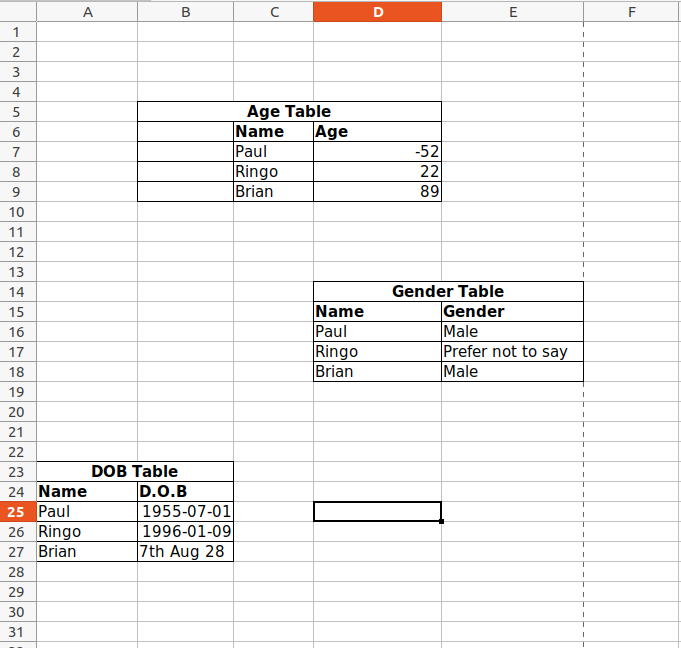

In [19]:
import plotly.express as px
from skimage import io
img = io.imread('AgeGenderDoB.png')
fig = px.imshow(img)
fig.show()

In [20]:
coord_df = pd.read_csv('coords.csv')
#coord_df.head(5)
all_polys = []
for index, row in coord_df.iterrows():
    top_left = [row['left'], row['top']]
    top_right = [row['left']+row['width'], row['top']]
    bottom_left = [row['left'], row['top'] + row['height']]
    bottom_right = [row['left'] + row['width'], row['top'] + row['height']]
    polygon = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
    all_polys.append(polygon)
    #print(row['text'], row['c2'])
just5 = all_polys[1:4]

In [21]:
all_poly_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[just5[0]])
i = 1
for p in just5[1:]:
    appendthis = gpd.GeoDataFrame(index=[i], crs='epsg:4326', geometry=[p])
    gdf = pd.concat([all_poly_gdf, appendthis])
    all_poly_gdf = gdf
    i = i + 1
    
    

In [22]:
all_poly_gdf

,geometry
0,"POLYGON ((182.00000 7.00000, 190.00000 7.00000..."
1,"POLYGON ((271.00000 7.00000, 279.00000 7.00000..."
2,"POLYGON ((313.00000 2.00000, 442.00000 2.00000..."


In [23]:

lat_point_list = [1,2,3,4]
lon_point_list = [1,1,3,4]

#polygon_geom = Polygon(zip(lon_point_list, lat_point_list))

polygon_geom = MultiPolygon(all_polys)
#crs = {'init': 'epsg:4326'}
#polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])      
polygon = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom], crs=4326)  

#polygon.plot()

#polygon_gpd = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom])  

print(polygon.crs)

epsg:4326


In [43]:
layout = dict(
    hovermode = 'closest',
    xaxis = dict(
        autorange = False,
        range = [150, 450],
        showgrid = False,
        zeroline = False,
        fixedrange = True
    ),
    yaxis = dict(
        autorange = False,
        range = [0, 30],
        showgrid = False,
        zeroline = False,
        fixedrange = False
    ),
    margin = dict(
        t=20,
        b=20,
        r=20,
        l=20
    ),
    width = 900,
    height = 500,
    dragmode = 'select'
)

In [44]:
plot_data = []
df = all_poly_gdf
for index, row in df.iterrows():
    if df['geometry'][index].type == 'Polygon':
        x, y = row.geometry.exterior.xy
        c_x, c_y = row.geometry.centroid.xy
    elif df['geometry'][index].type == 'MultiPolygon':
        poly = row.geometry
        x, y = [], []
        c_x, c_y = [], []
        for p in poly:
            _x, _y = p.exterior.xy
            x.append(_x), y.append(_y)
            _c_x, _c_y = p.centroid.xy
            c_x.append(_c_x), c_y.append(_c_y) 
    else: 
        print('stop')
        
    outline = dict(
            type = 'scatter',
            showlegend = False,
            legendgroup = "shapes",
            line = dict(color='black', width=1),
            x = np.asarray(x),
            y = np.asarray(y),
            fill = 'toself',
            fillcolor = 'purple',
            hoverinfo = 'none'
        )
    plot_data.append(outline)

In [45]:
plot_data

[{'type': 'scatter',
  'showlegend': False,
  'legendgroup': 'shapes',
  'line': {'color': 'black', 'width': 1},
  'x': array([182., 190., 190., 182., 182.]),
  'y': array([ 7.,  7., 17., 17.,  7.]),
  'fill': 'toself',
  'fillcolor': 'purple',
  'hoverinfo': 'none'},
 {'type': 'scatter',
  'showlegend': False,
  'legendgroup': 'shapes',
  'line': {'color': 'black', 'width': 1},
  'x': array([271., 279., 279., 271., 271.]),
  'y': array([ 7.,  7., 17., 17.,  7.]),
  'fill': 'toself',
  'fillcolor': 'purple',
  'hoverinfo': 'none'},
 {'type': 'scatter',
  'showlegend': False,
  'legendgroup': 'shapes',
  'line': {'color': 'black', 'width': 1},
  'x': array([313., 442., 442., 313., 313.]),
  'y': array([ 2.,  2., 22., 22.,  2.]),
  'fill': 'toself',
  'fillcolor': 'purple',
  'hoverinfo': 'none'}]

In [46]:
#fig = dict(data=plot_data, layout=layout)
fig = go.Figure(data=plot_data, layout=layout)
fig.show()

In [10]:
import plotly.graph_objects as go
import numpy as np

source='AgeGenderDoB.png'

fig=go.Figure()
fig.add_scatter(x=np.arange(0, 7), y=np.random.randint(2, 13, 7), 
                mode="lines", line_color="red", line_width=2)
fig.update_layout(template="plotly_white", width=400, height=400,
                 xaxis_showgrid=False, yaxis_showgrid=False)
fig.add_layout_image(
        source=source,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        xanchor="left",
        yanchor="top",
        layer="below",
        sizing="stretch",
        sizex=1.0,
        sizey=1.0
    )

In [11]:
import plotly.graph_objects as go
fig = go.Figure()
# Add image
img_width = 1600
img_height = 900
scale_factor = 0.5
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        source=source
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))
# Line shape added programatically
fig.add_shape(
    type='line', xref='x', yref='y',
    x0=650, x1=1080, y0=380, y1=180, line_color='cyan'
)
# Set dragmode and newshape properties; add modebar buttons
fig.update_layout(
    dragmode='drawrect',
    newshape=dict(line_color='cyan'),
    title_text='Drag to add annotations - use modebar to change drawing tool'
)
fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

In [12]:
fig = px.choropleth(all_poly_gdf,
                   geojson=all_poly_gdf['geometry'],
                   locations=all_poly_gdf.index,
                   color=all_poly_gdf.index,
                   #projection="equirectangular"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [13]:
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()


In [14]:
layout = dict(title='title')
fig=dict(data=polygon,layout=layout)
plt.plot(fig)

TypeError: plot() missing 1 required positional argument: 'kind'

In [ ]:
fig, ax = plt.subplots(1, 1)

polygon.plot(ax=ax)
ax.imshow(img)


In [ ]:
import matplotlib.pyplot as plt
img = plt.imread("AgeGenderDoB.png")
#fig, ax = plt.subplots()
plt.figure(10) # creates new figure if doesn't exist yet
plt.plot(polygon) # plots in figure 10

#p = gpd.GeoSeries(polygon_geom)
#p.plot()
plt.imshow(img)
plt.show()



In [ ]:
import contextily as ctx

def add_basemap(ax, zoom):
    url='AgeGenderDoB.png'
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Let's define our raw data, whose epsg is 4326
df = pd.DataFrame({
    'LAT'  :[1,2],
    'LONG' :[3,4],
})
df['coords'] = list(zip(df.LONG, df.LAT))

# ... turn them into geodataframe, and convert our
# epsg into 3857, since web map tiles are typically
# provided as such.
geo_df = gpd.GeoDataFrame(
    df,
    geometry = df['coords'].apply(Point)
)

# ... and make the plot
ax = geo_df.plot(
    figsize= (5, 5),
    alpha  = 1
)
add_basemap(ax, zoom=10)
ax.set_axis_off()
plt.show()